# Investigation Of No-Show Appointments Dataset

By: RITIKA MANDAL

# Table of contents:

 Introduction

Questions

Data Wrangling

Data Cleaning

Data Analysis

# INTRODUCTION

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

# POSING QUESTIONS:

1. Do SMS reminders decrease the number of absences?
2. Are no-show appointments associated with a certain gender?
3. Are chronic illnesses like hypertension and diabetes affecting patient's absences?
4. Is the percentage of people missing the appointments more or less?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


%matplotlib inline

In [25]:
df=pd.read_csv("C:/Users/RITIKA MANDAL/Downloads/nanodegree/noshow.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [26]:
def duplicated(dataframe):
    return(sum(dataframe.duplicated()))

The given function is used to calculate and return the number of duplicate values in the provided dataframe.

In [27]:
x=duplicated(df)
x

0

After checking for the number of duplicated values, the value returned is 0. Which implies that the number of duplicated values in the given dataframe in zero or none.

In [29]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)


In [33]:
df['PatientId'] = df['PatientId'].astype('int64')
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay']) 
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 11.8+ MB


In [36]:
df.drop('AppointmentID', axis=1, inplace=True)

For the data cleaning section the following steps were taken:
1. Missing values were checked
2. Checking for duplicate values were dpne
3. Hipertension column was renamed to "Hypertension"
4. "Handcap" columnn was renamed to "Handicap"
5. "PatientId" column was changed to int64
6. "ScheduledDay" and "AppointmentDay" columns were chnaged to datetime
7. "AppointmentID" column was dropped.

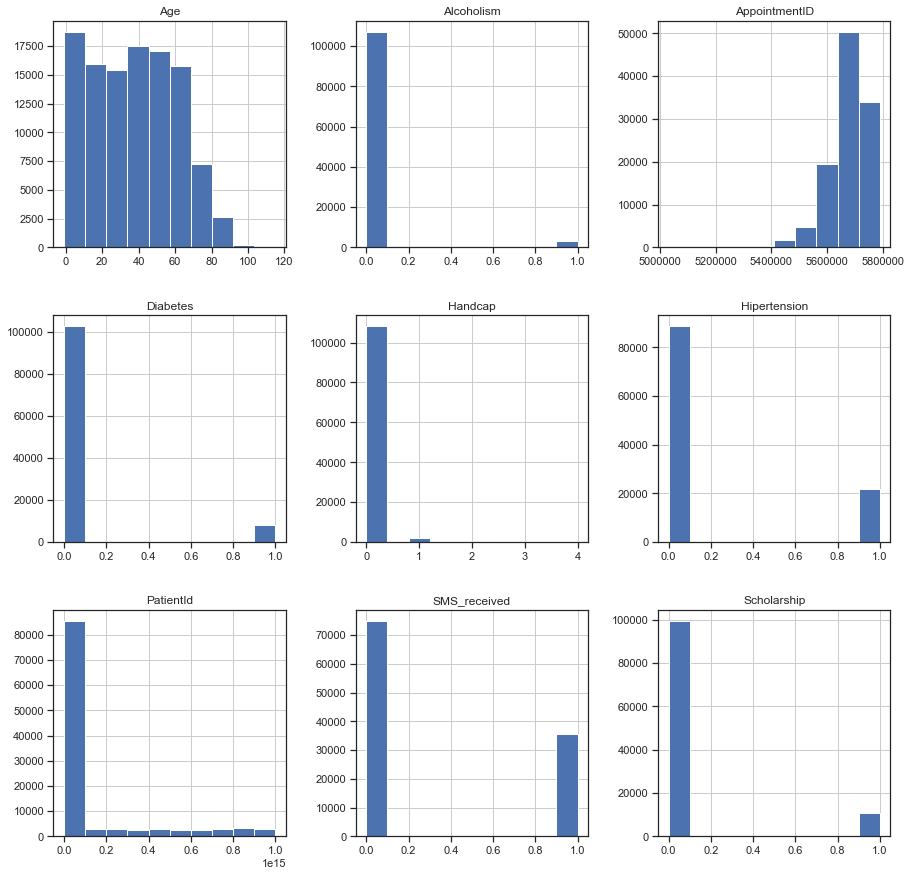

In [7]:
df.hist(figsize=(15,15));

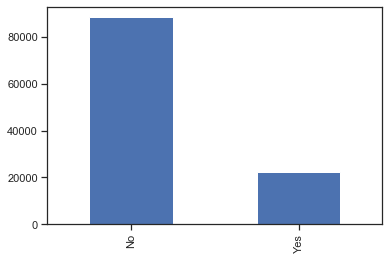

In [5]:
df["No-show"].value_counts().plot(kind="bar");

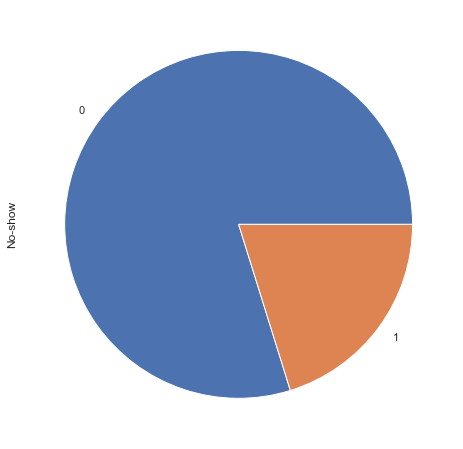

In [38]:
df["No-show"].value_counts().plot(kind="pie",figsize=(8,8));

As seen from the pie-chart, It is clearly seen that the percentage of No-Show being no is greater than the percentage of No-show being Yes.

In [37]:
labelencoder = LabelEncoder()
df["No-show"] = labelencoder.fit_transform(df["No-show"])
df["Gender"]= labelencoder.fit_transform(df["Gender"])

In [8]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


Since the No-show column comprised of only categorical data, hence it needs to be LabelEncoded in order for further analysis. Hence, as seen from the above table, the last column was label encode. 

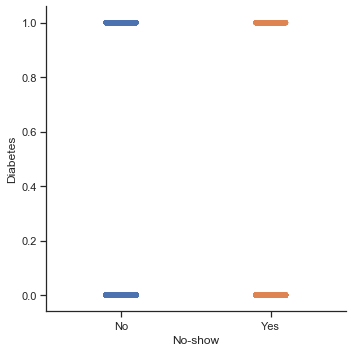

In [3]:
sns.catplot(x="No-show", y="Diabetes",data=df);

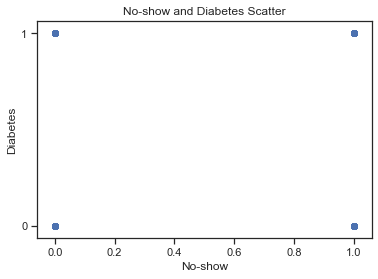

In [42]:
plt.scatter((df["No-show"]),(df["Diabetes"]))
#plt.xticks(np.arange(0, 51, 5)) 
plt.yticks(np.arange(0, 2, 1)) 
plt.title("No-show and Diabetes Scatter")
plt.xlabel("No-show")
plt.ylabel("Diabetes")
plt.show()

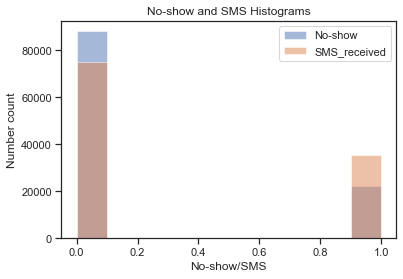

In [41]:
plt.hist(df["No-show"], alpha=0.5, label="No-show")
plt.hist(df["SMS_received"], alpha=0.5, label="SMS_received" )
plt.title("No-show and SMS Histograms")
plt.xlabel("No-show/SMS")
plt.ylabel("Number count")
plt.legend(loc="upper right")

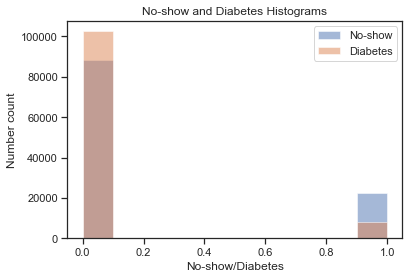

In [40]:
plt.hist(df["No-show"], alpha=0.5, label="No-show")
plt.hist(df["Diabetes"], alpha=0.5, label="Diabetes")
plt.title("No-show and Diabetes Histograms")
plt.xlabel("No-show/Diabetes")
plt.ylabel("Number count")
plt.legend(loc="upper right")

# CONCLUSION:

1.	It is clearly seen that the percentage of people visiting the doctor is more than that of the percentage of people who are not visiting.
2.	The percentage of people not visiting the doctor is less than 25 percent.
3.	One of the main factor as seen is SMS_received. People who didn’t receive message, their No-show value is “NO” i.e. they visit the doctor and vice-versa.
4.	The other not so important factors be gender and scholarship.


# LIMITATIONS:

1. Most of the variables are categorical and they don't allow for statistical calculations.
2. Cannot show strong correlation between categorical variables